# Your first genetic algorithm

Now that you understand the building block of a neural network, we will create one based on genetic evolution.<br>
You will first need to install the gym_snake from seanbae.<br><br>

<center><b><a href="https://github.com/nicomon24/Sneks" target="_blank">https://github.com/nicomon24/Sneks</a></b></center><br><br>
To install the library, run the following cell (this may take a few minutes)

In [1]:
!git clone https://github.com/nicomon24/Sneks
!pip install -e ./Sneks

Cloning into 'Sneks'...


Obtaining file:///D:/git/all-ml/Sneks
  Found existing installation: sneks 0.0.1
    Uninstalling sneks-0.0.1:
      Successfully uninstalled sneks-0.0.1
  Running setup.py develop for sneks


c:\users\alexandre\appdata\local\programs\python\python36\lib\site-packages\pip\_internal\req\req_install.py:391: UserWarning: Unbuilt egg for Unknown [unknown version] (c:\users\alexandre\appdata\local\programs\python\python36\lib\site-packages)
  self.satisfied_by = pkg_resources.get_distribution(str(no_marker))


If you are running on windows, execute this cell to complete the installation:

In [2]:
!move ./Sneks/sneks ./snek
!rd /s /q Sneks
!move ./snek ./sneks

        1 r‚pertoires d‚plac‚s.
        1 r‚pertoires d‚plac‚s.


Linux lovers, here is yours:

In [ ]:
!mv ./Sneks/sneks ./snek
!rm -rf gym-snake
!move ./snek ./sneks

# Basics of gym

Now that we have the environment ready to be used, we will focus on how this works.
Let's import the newly set environment.

In [3]:
import gym #Import gym library from OpenAI
import sneks

env = gym.make('babysnek-raw-16-v1') #Create the environment.

If the above cell did not execute correctly, please check you correctly have correctly have the sneks folder in the same directory of the notebook. It should be without any caps!

<center><img src="ipynb_images/install_snake.jpg"></img></center><br>

Ok. Now that your installation works and we created the environment, let's see how it works...

In [4]:
env.reset(); #This function is to call before each "game" your neural network will run.
#This will restart the game.
#The function returns a matrice of the observation state. I'll get back to this later.

In [5]:
env.render(); #This function is used to render a visual representation of what's going on in the game.
#You should see a window opening. If it freezes, it's normal. Don't panic!

Generally, the <i>env.render()</i> function is called when you want to see what your neural network does.<br>
However, you will see we will that most of the time we will not use this function.<br>
We want to train an agent and train it fast. Rendering is done at the same time the game is played, which reduces a lot the time performance!<br><br><br>
Now that we have started the environment we will play random actions to display how things work.<br>If you were in Mario, this action could be "move right, move left, jump...". Here, it is the movement of the snake we want to see.

In [6]:
env.action_space #Shows what is the structure of the expected input

Discrete(4)

The action_space is part of our environment. It describe here that we can give 4 different actions : 0, 1, 2 and 3.<br><br>
The environment is said <b><u>discrete</u></b> which means you can only select integer number.<br>
Discrete is opposed to <b><u>continuous</u></b>, which represents continuous variable.<br><br>
A discrete variable could be the face of a dice, it can only be 1, 2, 3, 4, 5 or 6.<br>But if you think of the weight of your dog, you would have something like 17,841Kg.<br>
Your dog don't come from 17Kg to 18Kg as a "jump". His weights <u>continuously</u> grows from 17 to 18. This is a continuous variable!

In [7]:
env.action_space.sample() #Calls a random possible movement of the snake, an integer between 0 and 4.

2

Now that we know what to send to the environment, we want our movement to be taken into consideration. For this, we will call the **env.step()** function.<br>
It returns the following information:<br>
- <u>Observation:</u> This is how the environment looks after your action. It allows you to track the movement of your snake. The observation is given when you execute a step and when you call *env.reset()*
- <u>reward:</u> The reward acquired in the last action. Did your snake eat the red dot ? If yes, this is a reward.
- <u>done:</u> Can you still play ? If your snake ate his tail or ran in the cliff... your game is finished. This is shown by a done set to True.
- <u>info:</u> Any additionnal information given by the environment.

In [8]:
env.step(env.action_space.sample())

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         101.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100., 100.,
         100.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
     

If you look at your opened window, you will see the black point did not move. It is because we need to call the env.render() to get an update.

In [9]:
env.reset();
print(env.step(env.action_space.sample()))
env.render();

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 101.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  

As you can see, the env.step() function returns a full matrice a observation.<br>
- 0 means you have nothing on the cell
- 255 is the food
- 101 is the head of the snake
- 100 is the tail of the snake<br><br>

In [10]:
#Generally, each 4 values are extracted as follow:
observation, reward, done, info = env.step(env.action_space.sample())

Now that we understand how Gym works we will start working on the neural network.

# The Neural network
## Data flow

When you enter in this new chapter, you should have already the basics of our building blocs from this <a href="https://github.com/alexandrelefourner/neural_networks_tutorial/blob/master/1.%20Neural%20Network%20principles%20exercices.ipynb" target="_blank">previous tutorial</a>. If not, I hardly recommend you to get a look at it.<br>
<br>
<br>
From what we saw with the gym environment, we need to select 1 out of 4 different numbers.
<br>This means our neural network will have 4 output neurons : One neuron for each decision.<br>

<center><img src="ipynb_images/neural_network_1.jpg"></img></center><br><br>

We feed the observation (each pixel) at the entrance of the neural network.<br>
Next, the information of the observation flows among the different layer of the neural network, up to the output layer.<br>
The neuron which lights at the end makes the decision to move the snake.<br><br>

## Genetic Algorithm Principles

Now that we understand how a decision wil be made to move the snake, we need to find out how to optimize this decision.<br>
For this, we will use a particular approach called _Genetic Algorithm_ which is based on evolution.<br>
The idea is to run an import number of simulations of similar networks. Once the simulation finished, we will check which network performed at best. Let's image 4 different networks:
- N1 got a score of -4
- N2 got a score of 31
- N3 got a score of 2
- N4 got a score of 10

We will take the best neural network (N2) and slightly modify it in multiple new versions (N2'1, N2'2, N2'3,...).<br><br>
This modification leads to a second generation of networks (N2').<br><br>
Being different, the networks may give different scores. We run new simulations and check the results:<br>
- N2'1 got a score of 32
- N2'2 got a score of 20
- N2'3 got a score of -2
- N2'4 got a score of 35


We take N2'4 to breed a new genertion and check again the results:<br>
- N2'4'1 got a score of 17
- N2'4'2 got a score of 60
- N2'4'3 got a score of 41
- N2'4'4 got a score of 28

N2'4'3 got the best result. We use it for next generation, etc...<br><br>
Progressively, we expect our networks to find the best structure to answer our problem.<br>
Let's create the first building block of our networks.

## Neural Network Skeleton & Forward pass

In [11]:
env.observation_space #We check the structure of the observation space.

Box(16, 16)

The input to give is a table of 16x16, as we saw previously.<br>
We will see in the future specific architecture which look at pixel and their surrouding, using <u>convolution</u>. For now however, we are not going to go that deep yet. Let's make it simple!<br>
We will consider each pixel separetely and flatten our representation :<br><br>


<center><img src="ipynb_images/flattening.jpg"></img></center><br><br>

In [12]:
import numpy as np #We will use numpy to speed up calculation.

Numpy is a python library based on C. This makes the calculations faster.<br>

In [13]:
class NeuralNetwork():
    def __init__(self): #Called when the model is created.
        self._layers = [] #We create a list which will contain all our layers information
        self._outputs = np.ones(4) #We create the output neurons of our neural network.

    def forward(self, inputs):#Called when the model must make a prediction.
        inputs = inputs.reshape(-1) #We create a 16x16 table and flatten it.
                                     #each cell of this table will be a neuron.
        pass
    
    def mutate(self):#Called when the model is selected to breed a new generation.
        pass

We now have the skeleton of our neural network.<br>
To calculate the dataflow, we could simply multiply each neuron separately... but this would be very long. Numpy helps us to do it faster through matrix multiplications. There is a complete video I made about this <a href="https://www.youtube.com/watch?v=RnbVW8ObWls" target="_blank">here</a> but you can find a summary:<br>
Imagine you have a neural network of 2 layers : 5 input neurons, 2 output neurons.<br><br>
<center><img src="ipynb_images/neural_network_2.jpg"></img></center><br><br>
For each neuron of the second layer, you need to multiply each 5 neurons by their weights and sum them.
This makes 10 different multiplication and 10 more additions.<br>

No1 = Ni1\*$W_{1}^{1}$ + Ni2\*$W_{1}^{2}$ + Ni3\*$W_{1}^{3}$ + Ni4\*$W_{1}^{4}$ + Ni5\*$W_{1}^{5}$<br>
No2 = Ni1\*$W_{2}^{1}$ + Ni2\*$W_{2}^{2}$ + Ni3\*$W_{2}^{3}$ + Ni4\*$W_{2}^{4}$ + Ni5\*$W_{2}^{5}$<br>

Lucky for us, the multiplication can be done in parallel, which means through parallelization, we can be up to 10 times faster when computing each layer.<br>
<br>
We need for this to compute through matrix multiplications. The value of our input is stored in a matrice (here, a vector because we only have 1 dimension) and the weights in a second matrice.<br>
By multiplying both, we are able to get our neurons value.<br><br>
<center><img src="ipynb_images/matmul.jpg"></img></center><br><br>

In [14]:
input_layer = np.arange(5).reshape((5,1)) #We create the matrice NiX
input_layer

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [15]:
weights_layer = np.arange(10).reshape((2,5)) #We generate the weights
weights_layer

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [16]:
output_layer = np.matmul(weights_layer,input_layer) #We calculate the multiplication
output_layer

array([[30],
       [80]])

Our forward pass will use matrices multiplications. Therefore, we can edit our neural network to match this idea. 

In [17]:
def activate(layer): #the neuron equals 1 if the sum is superior equal to 1.
                    #Otherwise, it's 0.
    return np.where(layer >= 1, 1, 0)

class NeuralNetwork():
    def __init__(self):
        self._layers = []
        self._outputs = np.ones(4)

    def forward(self, inputs):
        inputs = inputs.reshape((-1,1)) #Please note that we reshape with (-1,1) to have it as a matrice.
                                        #Having at least 2 dimensions is required for numpy to calculate matmul.
        
        for layer in self._layers: #We iterate through each layer.
            #layer contain the weights of the layer.
            #if we multiply them by the inputs, we get the value of the second layer
            #(we will need to activate them, but let's get to this after!)
            
            inputs = np.matmul(layer,inputs) #inputs now contains the value of the layer.
                                            #This layer will be used as input for the next layer.
            inputs = activate(inputs) #We don't forget to active the value!
        
        #inputs now contains the value of the last layer.
        #We perform the matrix multiplication based on our self.output
        
        #With the actual code... it would not work, because our self._outputs is not a matrice.
        #but we will fix it in the next cells.
        
        output_layer = np.matmul(self._outputs, inputs) 
        
        return activate(output_layer)
    
    def mutate(self):
        pass

The code is getting closer and closer to what we want... however, we have a multiple problems yet:
- The code does not contain any layer and thus, it cannot work (but we will work on that later!)
- Since the network only fires 0 and 1... what to do if 2 neurons of the output layer fire ?

If the network says "go up" and "go down" at the same time, we could randomly take one... But this points another problem we did not touch yet : Continuous and discrete space.<br><br>
Up to now, we built the blocks by getting inspired with the biological system. The rule of the "all or none" : A neuron fires an electric impulse, or it does not.<br>
<br>
If we want to make a decision however, we are not always "100% sure" of something. We base our decisions on a part of uncertainety:<br>
- "I am not totally sure I can jump to this high"
- "I may be able to gain a few minute if I drive through this road"

All of this mean means "part of me think it might be possible, but another don't...". To base my decision, I inconsciently measure what part think it might succeed and what part think it might fail. Sometimes, we are even unable to make a choice : we know we don't have enough information to make a rational decision.<br>
This is this idea of uncertainety that we will develop in the next part.

## Continuous Activation function

Remember when we discussed about the threshold ?... Well, here comes our problem. if we plot our current activation functon, we will get something like this :

In [18]:
import matplotlib.pyplot as plt

space = np.arange(-3, 3, 0.02)
activated = np.where(space >=1, 1, 0)
plt.plot(space,space, color = "blue");
plt.plot(space,activated, color = "orange");
plt.title("Neuron value in blue, once activate in orange (all or none)")
plt.axvline(0, color="red", alpha = 0.2);
plt.axhline(0, color="red", alpha = 0.2);

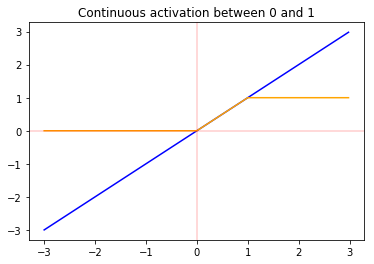

In [19]:
activated = np.where(space >=1, 1, np.where(space <0, 0, space))
plt.plot(space,space, color = "blue");
plt.plot(space,activated, color = "orange");
plt.title("Continuous activation between 0 and 1")
plt.axvline(0, color="red", alpha = 0.2);
plt.axhline(0, color="red", alpha = 0.2);

This activation function is better than the previous, because we now have a continuous activation.<br>
They are a vast number of activation, that you can find below. We will detail them more and see why they are so important in the next chapters.

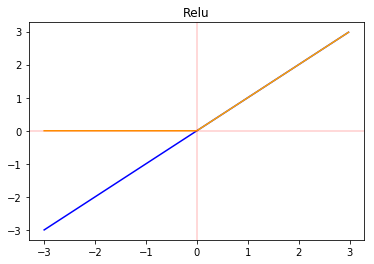

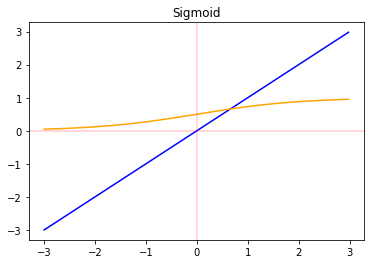

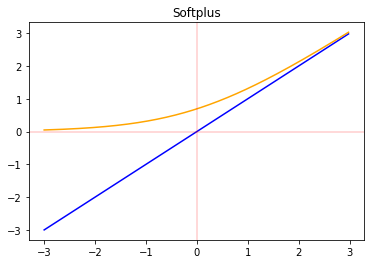

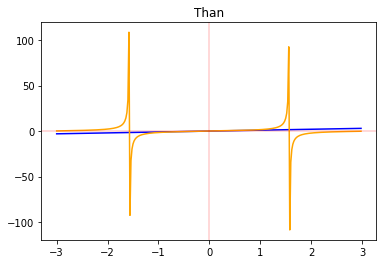

In [20]:
from lexml import lexmlcourses
lexmlcourses.display_activations_functions();

Our activation function tried to contrain the flow between 0 and 1. However, it does not give possibility to have values in between.<br>
Instead, we may use something which takes all values between 0 and 1, but reduce all values more than 1 to 1 and everything negative to 0.<br>
During this project, we will use sigmoid at the end of each layer. The idea behind is to keep some information from each gate, even if it is not that much.<br>
<br>
But what about our final layer ?... Even if the probability to get the same value for 2 neurons is inferior with sigmoid than it was with the All-or-None gate; we may prefere specific activation function, like <a href="https://en.wikipedia.org/wiki/Softmax_function">Softmax</a>.<br><br>

<center><img src="ipynb_images/softmaxfunction.jpg"></img></center><br><br>

If you did not do too much calculus in school Softmax may seem a bit complicated at first, but don't worry, it is not.<br>
If you have to remember one thing : If I activate all neurons of a layer with softmax, the sum of their activation will be 1.<br>
In genetic algorithm, we may not find a huge difference in performance compared to sigmoid.<br>
In the next chapter however, you will see more its efficiency.<br>

In [21]:
def sigmoid_activate(layer): #Sigmoid function
    return 1/(1+np.exp(-layer))


def softmax_activate(layer): #Softmax function
    m = np.exp(layer)
    return m/m.sum()

In [22]:
class NeuralNetwork():
    def __init__(self):
        self._layers = []
        self._outputs = np.ones(4)

    def forward(self, inputs):
        inputs = inputs.reshape((-1,1))
        
        for layer in self._layers:
            inputs = np.matmul(layer,inputs)
            inputs = sigmoid_activate(inputs) #Updated to sigmoid
        
        output_layer = np.matmul(self._outputs, inputs)
            #Does not take into account the different size of the matrix.
            #We will fix it soon!
        
        return softmax_activate(output_layer)#Updated to softmax
        

    def mutate(self):
        pass

## Finishing the forward pass
Up to now, we created a skeleton which can forward the data through different layers.<br>
We will now prepare the intialization of our neural networks.<br>
For this, we will initialize a certain number of layers with a certain size, but also adding the biases.<br>

In [25]:
nb_layers = 3 #We set up 3 hidden layers.
neurons = 25 #Neurons per layers

In [31]:
class NeuralNetwork():
    def __init__(self, observation_size): #We specify the observation
        self._layers = []
        self._biases = [] #we implement the biases
        
        for i in range(nb_layers):
            entry_size = neurons if i != 0 else observation_size #First layer must match the input layer.
                                                                #Remember : The input layer is all the map, flattened.
            
            #our weights values will be from -1 to 1.
            self._layers.append(np.random.rand(neurons,entry_size)*2-1) #we initialize random values
            self._biases.append(np.random.rand(neurons, 1)*2-1) #we initialize random values.
        

        self._outputs = np.random.rand(4,neurons)*2-1 #Output layer must contain a total of 4 cells.
        #We don't add it into self._layers because we want to activate it with a softmax.


    def forward(self, inputs):
        inputs = inputs.reshape((-1,1))
        

        for layer, bias in zip(self._layers, self._biases): #we zip the biases to the layer
            inputs = np.matmul(layer,inputs)
            inputs = inputs+bias
            inputs = sigmoid_activate(inputs)
            
        inputs = np.matmul(self._outputs, inputs) #(4,1)
        inputs = inputs.reshape(-1) #Just a vector of 4 elements.
        
        
        return softmax_activate(inputs)#Updated to softmax

    def mutate(self):
        pass

In [32]:
#Let's test our forward pass
obs_size = env.observation_space.shape[0] * env.observation_space.shape[1]
Sample = NeuralNetwork(obs_size) #Creating a new agen.

#random observation
obs = np.random.rand(obs_size)

choice = Sample.forward(obs)
print("list of decision:",choice)
print("Decision taken:",choice.argmax())

list of decision: [0.00714822 0.05383172 0.05771648 0.88130358]
Decision taken: 3


We successly implemented the forward pass!
Our agent is now able to take a decision based on the input we provide.

## First simulation

Now that our agent can take a decision, we will generate an environment for it to run.

In [33]:
import time #used to wait between each frame.

observation = env.reset()#We get the first element of the game.
env.render() #We render it.

done = False #While not True, the simulation runs.

time.sleep(2) #We want to wait 2 seconds to have the time to see the beginning of the simulation.

while(not done):
    observation, reward, done, info = env.step(Sample.forward(observation).argmax()) #We exectue an action.
    env.render() #We tell gym we want to render.
    time.sleep(0.1) #Used for rendering.

Well... The snake moves but rush toward the cliff. Our Artificial Intelligence does not show too much intelligence... and it's normal. Its behavior is totally made through randomness.<br>

